In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
n = 50
g = nx.grid_2d_graph(n,n)

In [3]:
def infect(p):
    global n, g
    infectious = [random.choice(list(g.nodes()))]
    time = 1
    infected = []
    while infectious:
        infected += infectious #add infectious nodes to infected list
        time += 1
        infectious_next = set() #make sure no duplicates in next infectious list
        for v in infectious:
            for u in g.neighbors(v):
                if random.random() <= p: #infect with prob p
                    infectious_next.add(u)
        infectious = [v for v in list(infectious_next) if v not in infected]
    return time, len(infected)/n

In [4]:
def get_avg(p,m):
    times = []
    infected = []
    for i in range(m):
        t, i = infect(p)
        times.append(t)
        infected.append(i)
    return sum(times)/m, sum(infected)/m

In [11]:
testpoints = 100
testpoints2 = 250
testpoints3 = 100
p = 0
ptests= []
times = []
infected = []
m = 50

while p <= 0.5:
    ptests.append(p)
    t, i = get_avg(p,m)
    times.append(t)
    infected.append(i)
    p += 0.5/testpoints
    
p = 0.5
while p <= 0.8:
    ptests.append(p)
    t, i = get_avg(p,m)
    times.append(t)
    infected.append(i)
    p += 0.3/testpoints2
p = 0.8
while p <= 1:
    ptests.append(p)
    t, i = get_avg(p,m)
    times.append(t)
    infected.append(i)
    p += 0.2/testpoints3

Text(0, 0.5, 'Epidemic length')

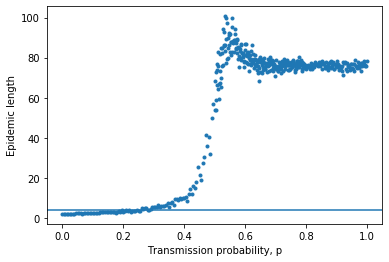

In [14]:
plt.plot(ptests, times, '.')
plt.axhline(y = np.log(n))
plt.xlabel("Transmission probability, p")
plt.ylabel("Epidemic length")

Text(0, 0.5, 'Average Epidemic Size')

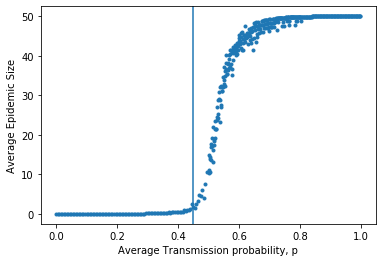

In [15]:
plt.plot(ptests, infected, '.')
plt.axvline(x = 0.45)
plt.xlabel("Average Transmission probability, p")
plt.ylabel("Average Epidemic Size")